Reference: https://python.langchain.com/docs/tutorials/summarization/

### Text-Summarization
There are three way in langchain using which we can do text summarization
- **Stuff:** which simply concatenates documents into a prompt
- **Map-reduce:** which splits documents into batches, summarizes those and then summarizes the summaries
- **Refine:** which updates a rolling summary be iterating over the documents in a sequence

In [1]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

groq_llm=ChatGroq(model="Gemma-7b-It")

In [5]:
# long speech on techer's day
speech="""
Good Morning! Honorable Principal sir, director sir, teachers, chief guests, and my dear friends. I am Jagdish Rathor and I study in class 10th. It’s an honour and a huge pleasure for me to be standing here today. On this special occasion, I want to say few words on behalf of our respected teachers, who are thought of as the backbone of our society. Today is Teacher’s Day, which is a celebration of Dr. Sarvepalli Radhakrishnan’s birthday. He was one of the best teachers our nation has ever had. He was also India’s second president. Dr. Radhakrishnan told that it would be a great honor for him if they didn’t celebrate his birthday on September 5 but instead made it Teachers’ Day. This really shows how much he cared about teaching and how much he wanted to honor all teachers.
We all know that the word “teacher” is hard to describe. It’s not easy to be a teacher, because they have to teach students all day without sitting down, figuring out their strengths and weaknesses, and then work on them in the right way. Teachers don’t just shape the lives of the students they teach, but also the lives of the whole generation. Teaching is more than just a good job. It’s also one of the greatest contributions to mankind. A teacher is an intellectual and spiritual guide, and they help their students so that they can spread their wings and fly. They give us the strength to get through life’s hard times. They help us turn our raw potential into beautiful realities. They plant the seeds of knowledge, grow our skills, and give us the power to become the best versions of ourselves. In addition to giving us knowledge, teachers also teach us essential values and qualities that shape us. They teach us how important it is to be honest and have ethics, to respect others, and to never give up. They make us want to dream big, follow our interests, and keep going even when things get hard.
Teacher’s Day is a good time to tell our teachers how much we appreciate them and how important they are to us. Without them, our lives would be useless. As we celebrate Teachers’ Day today, let’s thank the teachers who have made a difference in our lives. Let’s appreciate the pleasure of remembering how hard they worked to make their lessons interesting, how patiently they answered all of our questions, and how much they cared about us when we needed it the most. I bow my head and thank them from the bottom of my heart, now and always. Have a happy teacher’s day! Last but not least, I’d like to end my speech with a quote from Dr. APJ Abdul Kalam: “The goal of education is to make good people who are skilled and knowledgeable. Teachers can help people become more enlightened.” Thank you to all of my teachers, who have always shown us the way and been there for us.
"""

#### 1st way of summarizing the text

In [13]:
from langchain.schema import ( AIMessage, HumanMessage, SystemMessage)

prompt=[
    SystemMessage(content="You are an expert with experise in summarizing speeched"),
    HumanMessage(content=f"Please provide a short and concise summary of following speech:\n Text-{speech}")
]

print(groq_llm.get_num_tokens(speech))

# by directly passing the prompt to llm call
groq_llm(prompt).content
print(groq_llm(prompt))

639
content="**Summary:**\n\nTeacher's Day is celebrated to honor the invaluable contributions of educators. The speaker expresses deep appreciation for the guidance and inspiration provided by teachers. They highlight the selfless dedication of teachers who not only impart knowledge but also shape the values and character of their students. The speech reminds us of the profound impact teachers have on shaping lives and encouraging personal growth." additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 647, 'total_tokens': 721, 'completion_time': 0.087323068, 'prompt_time': 0.431433172, 'queue_time': 0.003164075000000044, 'total_time': 0.51875624}, 'model_name': 'Gemma-7b-It', 'system_fingerprint': 'fp_7d8efeb0b1', 'finish_reason': 'stop', 'logprobs': None} id='run-7642172e-2811-4642-99a9-a227999b15c8-0' usage_metadata={'input_tokens': 647, 'output_tokens': 74, 'total_tokens': 721}


#### 2nd way of summarizing very very long text

In [17]:
# we used to create chain like llm|prompt|output_parser
# but with LLMChain we only need llm and prompt because whatever will be the defualt string output parser that will get the response with 
from langchain.chains import LLMChain
from langchain import PromptTemplate

generictemplate=""" 
Write a summary of the following speech:
Speech:{speech}
Translate the precise summary to {lang}
"""

prompt=PromptTemplate(
    input_variables=['speech','lang'],
    template=generictemplate
)

full_prompt=prompt.format(speech=speech,lang="Hindi")
print(full_prompt)
print(groq_llm.get_num_tokens(full_prompt))

 
Write a summary of the following speech:
Speech:
Good Morning! Honorable Principal sir, director sir, teachers, chief guests, and my dear friends. I am Jagdish Rathor and I study in class 10th. It’s an honour and a huge pleasure for me to be standing here today. On this special occasion, I want to say few words on behalf of our respected teachers, who are thought of as the backbone of our society. Today is Teacher’s Day, which is a celebration of Dr. Sarvepalli Radhakrishnan’s birthday. He was one of the best teachers our nation has ever had. He was also India’s second president. Dr. Radhakrishnan told that it would be a great honor for him if they didn’t celebrate his birthday on September 5 but instead made it Teachers’ Day. This really shows how much he cared about teaching and how much he wanted to honor all teachers.
We all know that the word “teacher” is hard to describe. It’s not easy to be a teacher, because they have to teach students all day without sitting down, figuring o

In [23]:
llm_chain=LLMChain(llm=groq_llm,prompt=prompt)
summary=llm_chain.run({'speech':speech,'lang':"hindi"})
print(summary)

**Summary:**

नमस्ते! मान्य प्रिंसिपल साहब, निदेशक साहब, शिक्षकों, मुख्य अतिथियों और मेरे शुभ मित्र। मैं जगदीश रथोर कहता हूं और मैं 10वीं कक्षा में पढ़ता हूं। मुझे आज इस अवसर पर बोलने का मान और भलाव है। मैं अपने सम्मानित शिक्षकों के लिए कुछ शब्द कहना चाहता हूं, जिन्हें समाज का मूल्य बनता है। आज शिक्षकों के दिवस का समर्पित है, जो डॉ. सर्वेपल्ली रधाकृषण का जन्मदिन है। वे हमारे देश में सबसे महंगे शिक्षकों में से एक थे। वे बताते हैं कि उन्हें 5 सितंबर को जन्मांत्व का उत्सव नहीं मनाने से बड़ा सम्मान होगा, बल्कि शिक्षकों का सम्मान करने से।

हम जानते हैं कि शिक्षा शब्द बहुत जटिल है। शिक्षक दिन भर छात्रों को पढ़ाए बिना, उनके प्रतिभाओं और कमियों को बताए बिना, और उन्हें सही तरीकों से काम करने के लिए काम करने से नहीं मिलता। शिक्षकों ने केवल छात्रों के जीवन को नहीं बदल दिया, बल्कि पूरे पिछले पीढ़ के जीवन को भी बदल दिया। शिक्षा केवल एक अच्छा काम नहीं है। यह मानवता के सबसे बड़े योग्य में से एक भी है। शिक्षक एक वक्ता और आध्यात्मिक गाइड हैं, और वे छात्रों को अपने लिए वायुमिल बनाते हैं। वे हमारे लिए ता

#### Stuff Document Chain
This is most basic technique of text summarization.

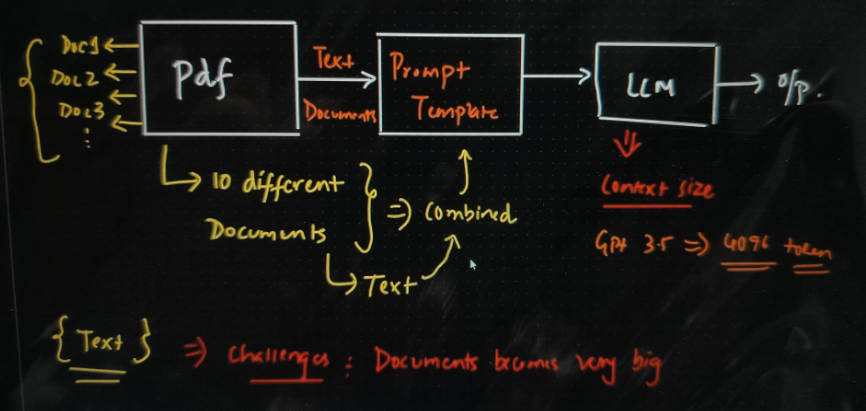

If the docs content fits in the LLM window then directly give the entire doc to LLM and get the summary.

Challenge: Large docs like 10 docs each having 10 pages or more

In [26]:
from langchain.document_loaders import PyPDFLoader

file=PyPDFLoader("../files/apjspeech.pdf")
docs=file.load_and_split()
docs

[Document(metadata={'source': '../files/apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \

In [27]:
generictemplate=""" Write a concise and short summary of the following speech,
Speech:{text}"""

prompt=PromptTemplate(
    input_variables=['text'],
    template=generictemplate
)

In [29]:
from langchain.chains.summarize import load_summarize_chain

# in chain_type attribute we can pass three values: stuff, map_reduce, refine
chain=load_summarize_chain(groq_llm,chain_type="stuff",prompt=prompt,verbose=True)

output_summary=chain.run(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
 Write a concise and short summary of the following speech,
Speech:A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online inte

'## Summary of A.P.J. Abdul Kalam\'s Departing Speech\n\n**Theme:** Inspiring the nation to achieve the vision of "Developed India 2020."\n\n**Key Points:**\n\n* **Empowering rural communities:** Emphasis on connecting rural areas through infrastructure and opportunities, citing the example of the PURA project in Thanjavur.\n\n\n* **Agriculture and food security:** Underscoring the importance of boosting agricultural productivity and empowering farmers.\n\n\n* **Overcoming challenges through unity:** Highlighting the resilience and courage of the people in overcoming natural disasters and adversity.\n\n\n* **Promoting technological connectivity:** Advocate for the Pan African e-Network to bridge the digital divide and promote societal transformation.\n\n\n* **Defense and national pride:** Expressing appreciation for the dedication and sacrifice of the Indian Armed Forces and security forces.\n\n\n* **Empowering the youth:** Encouraging the youth to embrace education, develop leadership